# Sentiment Analysis with IMDB Movie Review using DeepInsight

In [1]:
!pip install git+git://github.com/alok-ai-lab/DeepInsight.git#egg=DeepInsight

In [1]:
import tensorflow as tf
from keras.datasets import imdb
from keras.preprocessing import sequence
import os
import numpy as np

In [2]:
from pyDeepInsight import ImageTransformer, LogScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
from tensorflow.keras import datasets, layers, models

In [4]:
VOCAB_SIZE = 88584
MAXLEN = 250
BATCH_SIZE = 64

In [5]:
(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words=VOCAB_SIZE)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [7]:
len(test_data)

25000

In [8]:
train_data = train_data[:10000]
train_label = train_label[:10000]
test_data = test_data[:10000]
test_label = test_label[:10000]

In [9]:
train_data = sequence.pad_sequences(train_data, MAXLEN)
test_data = sequence.pad_sequences(test_data, MAXLEN)

In [10]:
ln = LogScaler()
X_train_norm = ln.fit_transform(train_data)
X_test_norm = ln.transform(test_data)

In [29]:
it = ImageTransformer(feature_extractor='tsne', 
                      pixels=50, random_state=1701, 
                      n_jobs=-1)

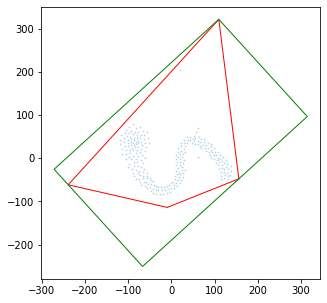

In [30]:
plt.figure(figsize=(5, 5))
it.fit(X_train_norm, plot=True)

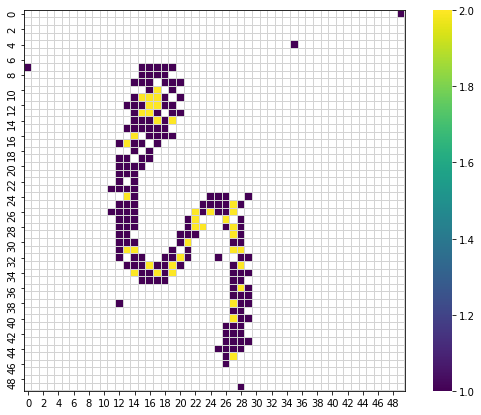

In [31]:
fdm = it.feature_density_matrix()
fdm[fdm == 0] = np.nan

plt.figure(figsize=(10, 7))

ax = sns.heatmap(fdm, cmap="viridis", linewidths=0.01, 
                 linecolor="lightgrey", square=True)
for _, spine in ax.spines.items():
    spine.set_visible(True)

In [32]:
mat_train = it.fit_transform(X_train_norm)

In [33]:
mat_test = it.transform(X_test_norm)

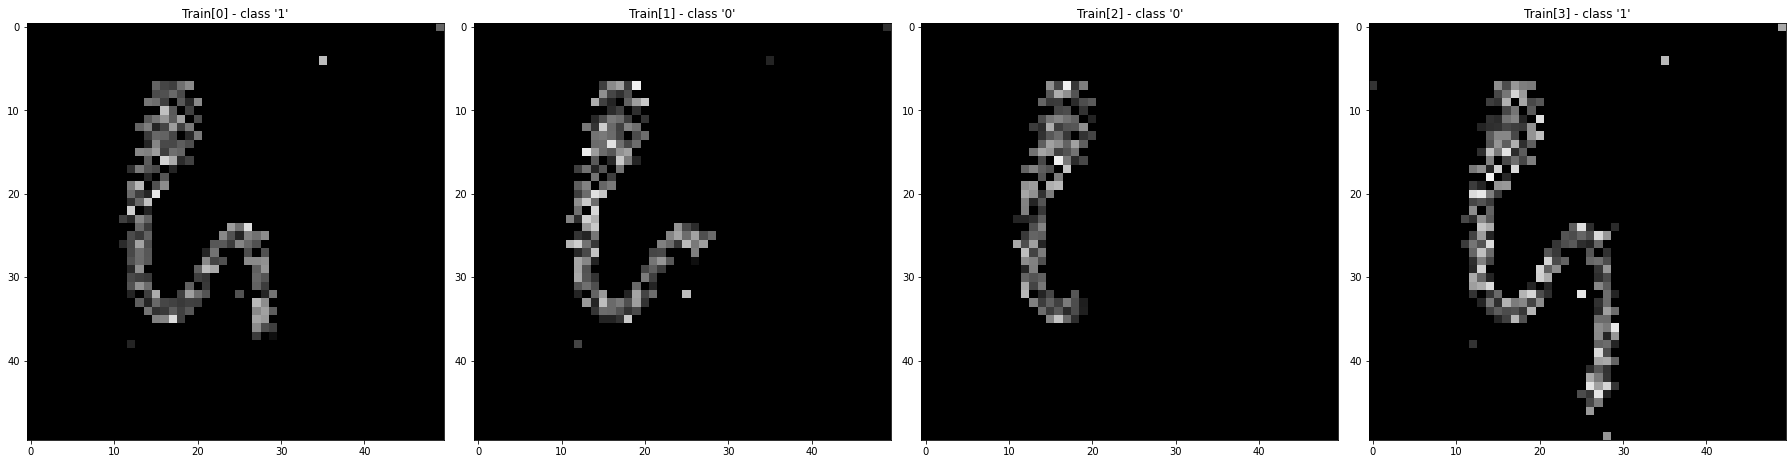

In [34]:
fig, ax = plt.subplots(1, 4, figsize=(25, 7))
for i in range(0,4):
    ax[i].imshow(mat_train[i])
    ax[i].title.set_text("Train[{}] - class '{}'".format(i, train_label[i]))
plt.tight_layout()

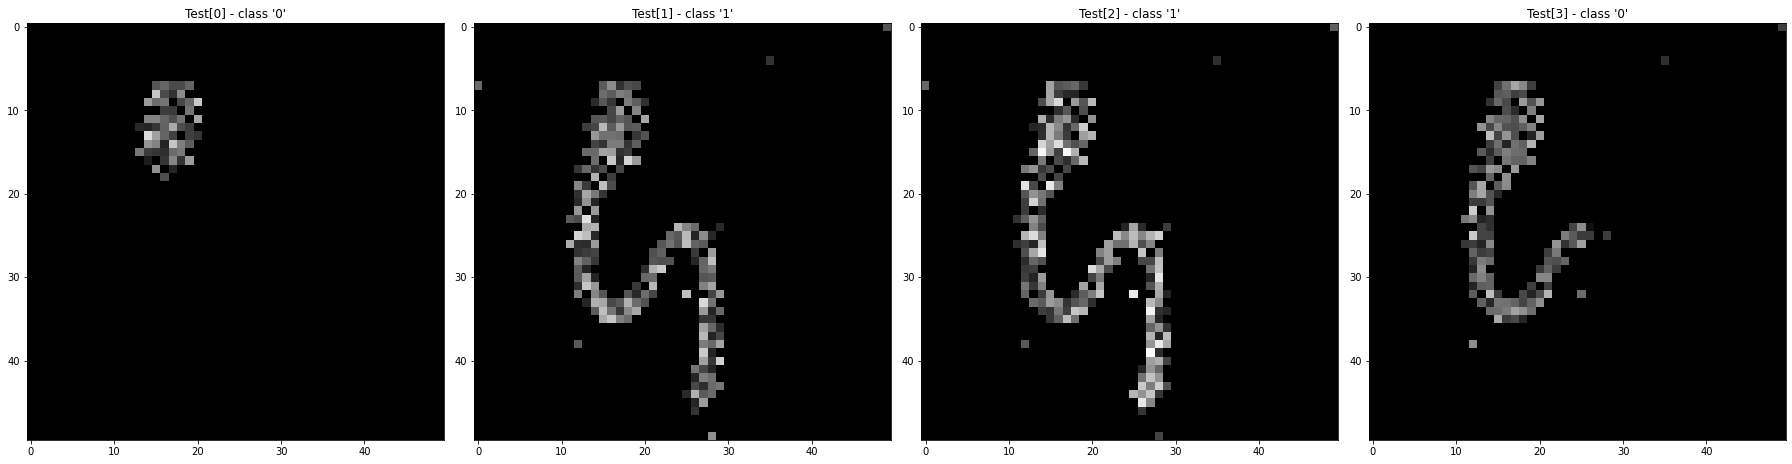

In [35]:
fig, ax = plt.subplots(1, 4, figsize=(25, 7))
for i in range(0,4):
    ax[i].imshow(mat_test[i])
    ax[i].title.set_text("Test[{}] - class '{}'".format(i, test_label[i]))
plt.tight_layout()

In [19]:
mat_train[0].shape

(100, 100, 3)

In [39]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=mat_train[0].shape))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 9, 9, 128)         73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 2048)             

In [40]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [41]:
model.fit(
    x=mat_train,
    y=train_label,
    batch_size=256,
    epochs=5,
)

Epoch 1/5
40/40 [==============================] - 30s 749ms/step - loss: 0.6940 - accuracy: 0.5132
Epoch 2/5
40/40 [==============================] - 30s 748ms/step - loss: 0.6925 - accuracy: 0.5074
Epoch 3/5
40/40 [==============================] - 33s 816ms/step - loss: 0.6915 - accuracy: 0.5278
Epoch 4/5
40/40 [==============================] - 30s 756ms/step - loss: 0.6903 - accuracy: 0.5323
Epoch 5/5
40/40 [==============================] - 30s 758ms/step - loss: 0.6901 - accuracy: 0.5279


In [42]:
model.evaluate(mat_test, test_label)

313/313 [==============================] - 10s 31ms/step - loss: 0.6937 - accuracy: 0.5174


[0.6936925053596497, 0.5174000263214111]